In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#initialise simple undirected graph
# G = nx.Graph()

#initialise simple directed graph
# G = nx.DiGraph()

#initialise an undirected graph with multiple edges per node
# G = nx.MultiGraph()

#initialise a directed graph with multiple edges per node
# G = nx.MultiDiGraph()

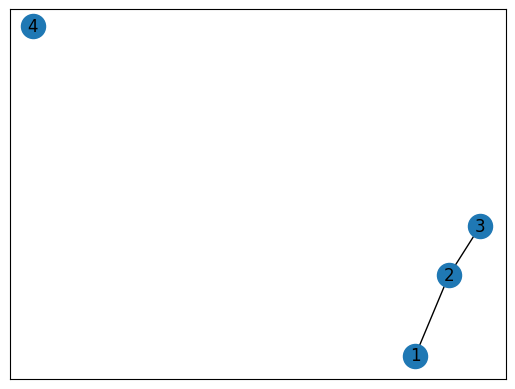

In [4]:
#this will add an edge between node 1 and 2... AND it will create these nodes if they don't exist
G = nx.Graph()
G.add_edge(1, 2)

#we can add a weight to the edges, this will correspond to the user choices 
G.add_edge(2,3, weight = 3)

#we can add a single node with no edges like this...
G.add_node(4)


#we can draw these graphs with a number of different methods...
layout = nx.spring_layout(G)
# layout = nx.circular_layout(G)
# layout = nx.kamada_kawai_layout(G)
# layout = nx.planar_layout(G) '''-- this one is not always possible'''
# layout = nx.random_layout(G)
# layout = nx.spectral_layout(G)
# layout = nx.shell_layout(G)
nx.draw_networkx(G, pos=layout, with_labels = True)
plt.show()

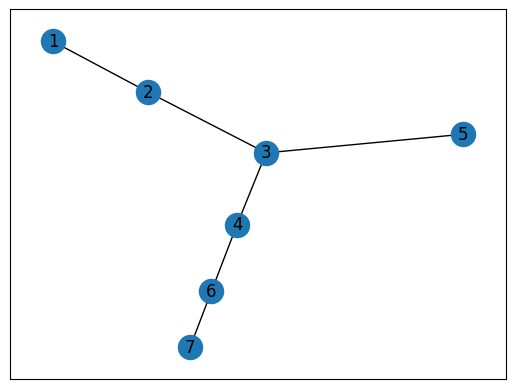

In [5]:
#we can also create a graph from an edgelist
edge_list = [(1,2), (2,3), (3,4), (3,5), (4,6), (6,7)]
G = nx.Graph()
# G = nx.from_edgelist(edge_list)
G.add_edges_from(edge_list,)

nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels = True)
plt.show()

/var/folders/c7/dcyx4ss130ldp4lp9ph0v16c0000gn/T/ipykernel_77428/3043582625.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G))


  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 2)	1
  (3, 5)	1
  (4, 2)	1
  (5, 3)	1
  (5, 6)	1
  (6, 5)	1


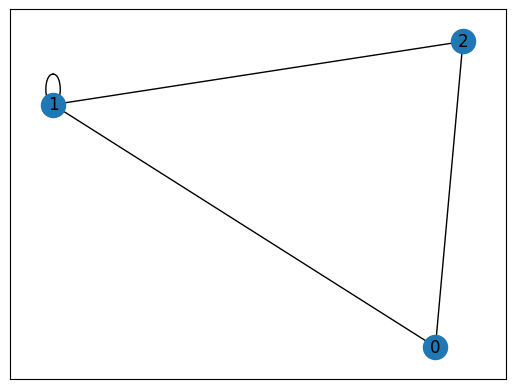

In [6]:
#Adjacency matrix
''' every node is represented as a row and a column, we can generate the adjacency matrix
of the graph above like this'''

print(nx.adjacency_matrix(G))

''' we can also creat a graph from a given adjacency matrix'''

G = nx.from_numpy_array(np.array(
        [[0, 1, 9],
          [1, 1, 1],
          [0, 0, 0]]))

nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels = True)
plt.show()

In [7]:
user_data = {'user_id':  [1,2,3,4,5,6,7],
        'assignment_id': [1,2,3,4,5,6,7],
        'first_choice_id': [6,3,2,7,1,3,5],
        'second_choice_id': [3,1,5,3,7,4,6],
        'third_choice_id': [2,7,4,6,2,7,1],
        }

users = pd.DataFrame(user_data)


hospital_data = {
    'hospital_id': [1,2,3,4,5,6,7],
    'hospital_name': ['Gauteng', 'Western Cape', 'Eastern Cape', 'Kwa-Zulu Natal', 'Limpopo', 'Freestate', 'North West']

}

hospitals = pd.DataFrame(hospital_data)

In [8]:
hospitals

,hospital_id,hospital_name
0,1,Gauteng
1,2,Western Cape
2,3,Eastern Cape
3,4,Kwa-Zulu Natal
4,5,Limpopo
5,6,Freestate
6,7,North West


In [9]:
users

,user_id,assignment_id,first_choice_id,second_choice_id,third_choice_id
0,1,1,6,3,2
1,2,2,3,1,7
2,3,3,2,5,4
3,4,4,7,3,6
4,5,5,1,7,2
5,6,6,3,4,7
6,7,7,5,6,1


In [10]:
''' in terms of swap-doctor we use a MultiDiGraph and solve for the minimum weight path(s)
- we need a users table where user_id is the unique identifier
- we need a hospital table where hosipal_id can link to hospital name
- we need a placements table where placement_id is the unique identifier, and each placement can be associated with a user_id and hospital_id'''


user_data = {'user_id':  [1,2,3,4,5,6,7],
        'first name': ['connor', ' cameron', 'ryan', 'roger', 'sam', 'oliver', 'james'],
        'last name': ['mcdonald', ' dawson', 'shackleton', 'wyllie', 'smith', 'brown', 'blunt'],
        }

users = pd.DataFrame(user_data).set_index('user_id')


hospital_data = {
    'hospital_id': [1,2,3,4,5,6,7],
    'hospital_name': ['Gauteng', 'Western Cape', 'Eastern Cape', 'Kwa-Zulu Natal', 'Limpopo', 'Freestate', 'North West']
}

hospitals = pd.DataFrame(hospital_data).set_index('hospital_id')

placement_data = {'user_id':  [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7],
        'assignment_id': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7],
        'choice_id': [6,3,2,3,1,7,2,5,4,7,3,6,1,7,2,3,4,7,5,6,1],
        'choice_weight': [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
        }

placements = pd.DataFrame(placement_data)
placements.index.names = ['placement_id']


In [11]:
users.head()

,first name,last name
user_id,,
1,connor,mcdonald
2,cameron,dawson
3,ryan,shackleton
4,roger,wyllie
5,sam,smith


In [12]:
hospitals.head()

,hospital_name
hospital_id,
1,Gauteng
2,Western Cape
3,Eastern Cape
4,Kwa-Zulu Natal
5,Limpopo


In [13]:
placements.head()

,user_id,assignment_id,choice_id,choice_weight
placement_id,,,,
0,1,1,6,1
1,1,1,3,2
2,1,1,2,3
3,2,2,3,1
4,2,2,1,2


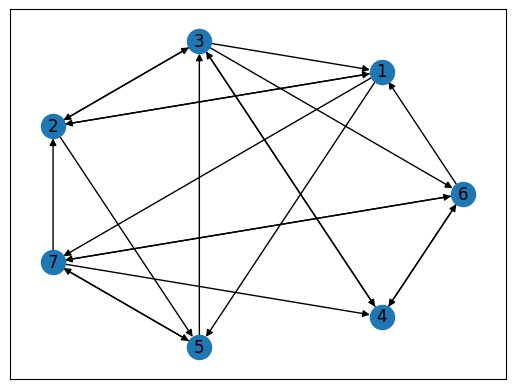

In [14]:
#initalise empty graph
G = nx.MultiDiGraph()

for i in placements.index:
    G.add_edge(placements.choice_id[i], placements.assignment_id[i], weight=placements.choice_weight[i])

nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True)
plt.show()

In [12]:
cycles = list(nx.simple_cycles(G))

for i in cycles:
    if len(i) == 7:
        path_wt = nx.path_weight(G,i,'weight')
        print(f'path weight is {path_wt} for cycle {i}')
        print('')

path weight is 15 for cycle [1, 7, 2, 5, 3, 4, 6]

path weight is 12 for cycle [1, 5, 7, 6, 4, 3, 2]

path weight is 10 for cycle [1, 5, 7, 2, 3, 4, 6]

path weight is 12 for cycle [1, 5, 3, 4, 6, 7, 2]

path weight is 15 for cycle [1, 2, 5, 7, 6, 4, 3]

path weight is 11 for cycle [1, 2, 5, 7, 4, 3, 6]



In [15]:
cycles = list(nx.simple_cycles(G))

In [16]:
cycles

[[1, 7, 6, 4, 3, 2],
 [1, 7, 6, 4, 3],
 [1, 7, 6],
 [1, 7, 5, 3, 6],
 [1, 7, 5, 3, 4, 6],
 [1, 7, 5, 3, 2],
 [1, 7, 5, 3],
 [1, 7, 4, 6],
 [1, 7, 4, 3, 6],
 [1, 7, 4, 3, 2],
 [1, 7, 4, 3],
 [1, 7, 2, 5, 3, 6],
 [1, 7, 2, 5, 3, 4, 6],
 [1, 7, 2, 5, 3],
 [1, 7, 2, 3, 6],
 [1, 7, 2, 3, 4, 6],
 [1, 7, 2, 3],
 [1, 7, 2],
 [1, 5, 7, 6, 4, 3, 2],
 [1, 5, 7, 6, 4, 3],
 [1, 5, 7, 6],
 [1, 5, 7, 4, 6],
 [1, 5, 7, 4, 3, 6],
 [1, 5, 7, 4, 3, 2],
 [1, 5, 7, 4, 3],
 [1, 5, 7, 2, 3, 6],
 [1, 5, 7, 2, 3, 4, 6],
 [1, 5, 7, 2, 3],
 [1, 5, 7, 2],
 [1, 5, 3, 6, 7, 2],
 [1, 5, 3, 6],
 [1, 5, 3, 4, 6, 7, 2],
 [1, 5, 3, 4, 6],
 [1, 5, 3, 2],
 [1, 5, 3],
 [1, 2, 5, 7, 6, 4, 3],
 [1, 2, 5, 7, 6],
 [1, 2, 5, 7, 4, 6],
 [1, 2, 5, 7, 4, 3, 6],
 [1, 2, 5, 7, 4, 3],
 [1, 2, 5, 3, 6],
 [1, 2, 5, 3, 4, 6],
 [1, 2, 5, 3],
 [1, 2, 3, 6],
 [1, 2, 3, 4, 6],
 [1, 2, 3],
 [1, 2],
 [2, 5, 7, 6, 4, 3],
 [2, 5, 7, 4, 3],
 [2, 5, 7],
 [2, 5, 3, 6, 7],
 [2, 5, 3, 4, 6, 7],
 [2, 5, 3],
 [2, 3, 6, 7],
 [2, 3, 4, 6, 7],
 [2, 3],
 

In [13]:
placement_choices = placements.merge(users, on='user_id', how='left')
placement_choices = placement_choices.merge(hospitals, left_on='choice_id', right_on='hospital_id', how='left')
placement_choices = placement_choices.merge(hospitals, left_on='assignment_id', right_on='hospital_id', how='left')
placement_choices

,user_id,assignment_id,choice_id,choice_weight,first name,last name,hospital_name_x,hospital_name_y
0,1,1,6,1,connor,mcdonald,Freestate,Gauteng
1,1,1,3,2,connor,mcdonald,Eastern Cape,Gauteng
2,1,1,2,3,connor,mcdonald,Western Cape,Gauteng
3,2,2,3,1,cameron,dawson,Eastern Cape,Western Cape
4,2,2,1,2,cameron,dawson,Gauteng,Western Cape
5,2,2,7,3,cameron,dawson,North West,Western Cape
6,3,3,2,1,ryan,shackleton,Western Cape,Eastern Cape
7,3,3,5,2,ryan,shackleton,Limpopo,Eastern Cape
8,3,3,4,3,ryan,shackleton,Kwa-Zulu Natal,Eastern Cape
9,4,4,7,1,roger,wyllie,North West,Kwa-Zulu Natal


In [14]:
placement_choices_clean = placement_choices.iloc[:, [0,4,5,7,6,3]]
placement_choices_clean=placement_choices_clean.rename(columns={'hospital_name_y': 'assigned_hospital_name', 
                                        'hospital_name_x': 'choice_hospital_name'})
placement_choices_clean

,user_id,first name,last name,assigned_hospital_name,choice_hospital_name,choice_weight
0,1,connor,mcdonald,Gauteng,Freestate,1
1,1,connor,mcdonald,Gauteng,Eastern Cape,2
2,1,connor,mcdonald,Gauteng,Western Cape,3
3,2,cameron,dawson,Western Cape,Eastern Cape,1
4,2,cameron,dawson,Western Cape,Gauteng,2
5,2,cameron,dawson,Western Cape,North West,3
6,3,ryan,shackleton,Eastern Cape,Western Cape,1
7,3,ryan,shackleton,Eastern Cape,Limpopo,2
8,3,ryan,shackleton,Eastern Cape,Kwa-Zulu Natal,3
9,4,roger,wyllie,Kwa-Zulu Natal,North West,1
